In [1]:
from agents import AgentsSwarm
from env import ParticlesSwarm

with_leader = False
altruistic = True
n = 3
if with_leader:
    agents_num = n - 1
else:
    agents_num = n
agents_swarm = AgentsSwarm(n=n, discount=0.9999, alpha=0.99, epsilon=0.25,
                           altruistic=altruistic, with_leader=with_leader)
env = ParticlesSwarm(n=n, with_leader=with_leader)

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import trange
matplotlib.use("Agg")
%matplotlib inline


def play_and_train(env, agents, t_max=1000):
    """
    This function should 
    - run a full game, actions given by agent's e-greedy policy
    - train agent using agent.update(...) whenever it is possible
    - return total reward
    """
    total_reward = np.array([0.0 for _ in range(agents_num)])
    total_dissipations = np.array([0.0 for _ in range(agents_num)])
    velocities = []

    s = env.reset()

    for t in range(t_max):
        # get agent to pick action given state s.
        a = agents.get_action(s)

        next_s, r, dissipations = env.step(a)

        # train (update) agent for state s
        agents.update(s, a, r, next_s)

        s = next_s
        total_reward += np.array(r)
        total_dissipations += np.array(dissipations)
        velocities.append(env.get_last_velocities())
    mean_velocities = list(np.mean(velocities, axis=0))
    mean_abs_velocities = [np.sqrt(np.dot(v, v)) for v in mean_velocities]
    return total_reward, total_dissipations, mean_abs_velocities

def altruistic_play_and_train(env, agents, t_max=1000):
    """
    This function should 
    - run a full game, actions given by agent's e-greedy policy
    - train agent using agent.update(...) whenever it is possible
    - return total reward
    """
    total_reward = 0.0
    total_dissipation = 0.0

    s = env.reset()

    for t in range(t_max):
        # get agent to pick action given state s.
        a = agents.altruistic_get_action(s)
        
        next_s, r, dissipations = env.step(a)

        # train (update) agent for state s
        agents.altruistic_update(s, a, r, next_s)

        s = next_s
        total_reward += sum(r)
        total_dissipation += sum(dissipations)
    return total_reward, total_dissipation

def play(env, agents, t_max=400):
    """
    This function should 
    - run a full game, actions given by agent's e-greedy policy
    - train agent using agent.update(...) whenever it is possible
    - return total reward
    """
    total_reward = np.array([0.0 for _ in range(agents_num)])
    total_dissipations = np.array([0.0 for _ in range(agents_num)])
    velocities = []

    s = env.reset()
    positions = []

    for t in range(t_max):
        last_positions = env.get_last_positions()
        positions.append(np.array(last_positions))

        a = agents.get_action(s, train=False)

        next_s, r, dissipations = env.step(a)

        s = next_s
        total_reward += np.array(r)
        total_dissipations += np.array(dissipations)
        velocities.append(env.get_last_velocities())
    mean_velocities = list(np.mean(velocities, axis=0))
    mean_abs_velocities = [np.sqrt(np.dot(v, v)) for v in mean_velocities]
    return total_reward, positions, total_dissipations, mean_abs_velocities

def altruistic_play(env, agents, t_max=40):
    """
    This function should 
    - run a full game, actions given by agent's e-greedy policy
    - train agent using agent.update(...) whenever it is possible
    - return total reward
    """
    total_reward = 0.0
    total_dissipation = 0.0

    s = env.reset()
    positions = []

    for t in range(t_max):
        last_positions = env.get_last_positions()
        positions.append(np.array(last_positions))

        a = agents.altruistic_get_action(s, train=False)

        next_s, r, dissipations = env.step(a)

        s = next_s
        total_reward += sum(r)
        total_dissipation += sum(dissipations)
    return total_reward, positions, total_dissipation

In [3]:
from IPython.display import clear_output
import matplotlib.animation as animation

np.random.seed(10)

rewards, dissipations = [], []
mean_rewards, mean_dissipations = [[] for _ in range(agents_num)], [[] for _ in range(agents_num)]

for i in range(1500):
    total_reward, total_dissipations, mean_velocities = play_and_train(env, agents_swarm)
    rewards.append(total_reward)
    dissipations.append(total_dissipations)

    clear_output(True)
    np_rewards = np.array(rewards).T
    np_dissipations = np.array(dissipations).T
    for agent in range(agents_num):
        mean_rewards[agent].append(np.mean(np_rewards[agent][-10:]))
        mean_dissipations[agent].append(np.mean(np_dissipations[agent][-10:]))
        print('eps =', agents_swarm.epsilon)
        print(mean_velocities)
        plt.plot(mean_rewards[agent])
        plt.grid()
        plt.show()
        #plt.plot(mean_dissipations[agent])
        #plt.grid()
        #plt.show()

    agents_swarm.epsilon *= 0.98

AttributeError: 'AgentsSwarm' object has no attribute '_qvalues'

eps = 0.005270535393658693


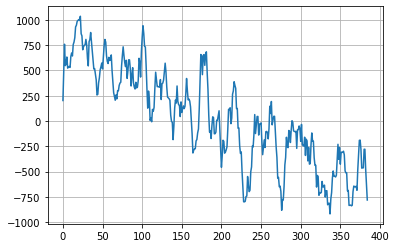

KeyboardInterrupt: 

In [3]:
from IPython.display import clear_output
import matplotlib.animation as animation

np.random.seed(10)

rewards, dissipations = [], []
mean_rewards, mean_dissipations = [], []

for i in range(1000):
    total_reward, total_dissipation = altruistic_play_and_train(env, agents_swarm)
    rewards.append(total_reward)
    dissipations.append(total_dissipation)

    mean_rewards.append(np.mean(rewards[-10:]))
    mean_dissipations.append(np.mean(dissipations[-10:]))
    clear_output(True)

    print('eps =', agents_swarm.epsilon)
    # plt.plot(rewards)
    plt.plot(mean_rewards)
    # plt.plot(mean_dissipations)
    plt.grid()
    plt.show()
    agents_swarm.epsilon *= 0.99

In [16]:
np.random.seed(10)

total_reward, positions, dissipations, velocities = play(env, agents_swarm)
print(dissipations)
print(total_reward)
print(velocities)

[22.75030471 23.71009965 23.6239152  21.57610051]
[673.62622216 701.75578781 702.63525548 682.8027697 ]
[0.22846003232934295, 0.2346898568914679, 0.23522839056357991, 0.21326544917507292]


ValueError: min() arg is an empty sequence

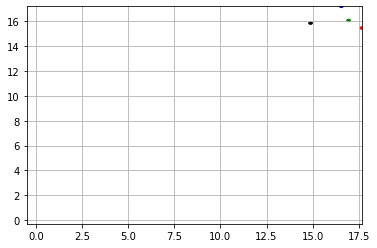

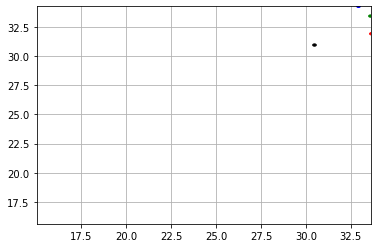

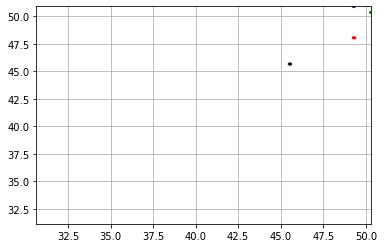

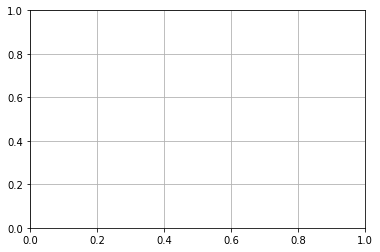

In [19]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.animation as animation
import tqdm

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)

episode_length = 100
for i in tqdm.tqdm_notebook(range(4)):
    fig, ax = plt.subplots()
    plt.grid()
    ims = []
    positions_batch = positions[i*episode_length:(i + 1)*episode_length]
    x_set, y_set = set(), set()
    for position in positions_batch:
        for agent in position:
            x_set.add(agent[0])
            y_set.add(agent[1])
    x_min, x_max = min(x_set), max(x_set)
    y_min, y_max = min(y_set), max(y_set)
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    for last_positions in positions_batch:
        circle1 = plt.Circle(last_positions[0], 0.1, color='r')
        circle2 = plt.Circle(last_positions[1], 0.1, color='g')
        circle3 = plt.Circle(last_positions[2], 0.1, color='b')
        circle4 = plt.Circle(last_positions[3], 0.1, color='black')
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(circle3)
        ax.add_artist(circle4)
        ims.append([circle1, circle2, circle3, circle4])

    im_ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat=False)
    im_ani.save('current/im_{}.mp4'.format(i), writer=writer)